#**Fast Forward Fourier Transform Algorithm Implementation**

Using a recursive implementation from Cooley-Tukey.

#**Library Loading**

In [1]:
import cmath
import math
import matplotlib.pyplot as plt
import numpy as np

#**FFT Function**

In [2]:
def FFT(array):
    """
    A recursive implementation of 
    the 1D Cooley-Tukey FFT, the 
    input should have a length of 
    power of 2. 
    """

    N = len(array)
    
    if N == 1:
        return array
    else:
      
        X_even = FFT(array[::2])
        X_odd  = FFT(array[1::2])
        
        factor = np.exp(-2j * np.pi * np.arange(N)/ N)
        
        x_fft = np.concatenate([X_even+factor[:int(N/2)] * X_odd,
                                X_even+factor[int(N/2):] * X_odd])
        return x_fft

#**Random Signal Generators**

In [3]:
def randomSig():
  ## Parameters used
  StopTime = 1  # End of signal 
  Fs = 1024     # Sampling rate
  f = 30        # Frequency of simulated signal

  ## Generate sample times
  t = np.linspace(0, StopTime, StopTime*Fs)

  ## Generate signal
  x = np.sin(2*np.pi*t*f)

  ## Add noise to signal
  noise = np.random.randn(len(x))
  #print('rms noise value:', math.sqrt(np.mean(np.random.randn(10)**2)))
  xn = x + noise

  plt.plot(t, x)
  plt.show() 

  return xn, t

In [4]:
def radnSig():

  # Sampling rate
  sr = 128

  # Sampling interval
  ts = 1.0/sr
  t = np.arange(0,1,ts)

  freq = 1.
  x = 3*np.sin(2*np.pi*freq*t)

  freq = 4
  x += np.sin(2*np.pi*freq*t)

  freq = 7   
  x += 0.5* np.sin(2*np.pi*freq*t)

  plt.figure(figsize = (8, 6))
  plt.plot(t, x, 'r')
  plt.ylabel('Amplitude')

  plt.show()

  return x, t

#**Results**

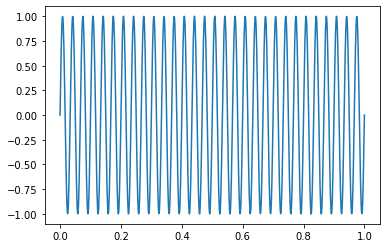

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


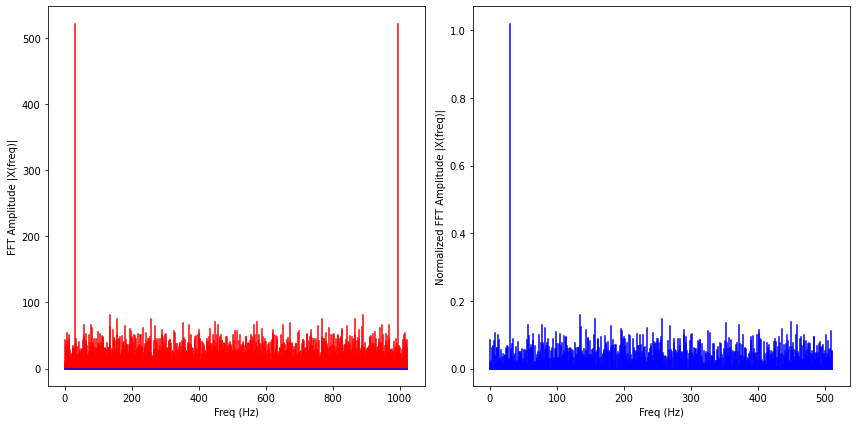

True


In [8]:
signal, time = randomSig()

X = FFT(signal)

# Calculate the frequency
N = len(X)
n = np.arange(N)
T = N/1024
freq = n/T 

plt.figure(figsize = (12, 6))
plt.subplot(121)
plt.stem(freq, np.abs(X), 'r', markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')

# Get the one-sided specturm
n_oneside = N//2
# Get the one side frequency
f_oneside = freq[:n_oneside]

# Normalize the amplitude
X_oneside = X[:n_oneside]/n_oneside

plt.subplot(122)
plt.stem(f_oneside, abs(X_oneside), 'b', markerfmt=" ", basefmt="-b")

plt.xlabel('Freq (Hz)')
plt.ylabel('Normalized FFT Amplitude |X(freq)|')
plt.tight_layout()
_ = plt.show()

print(np.allclose(FFT(signal), np.fft.fft(signal)))

#**References**

- [Berkeley](https://pythonnumericalmethods.berkeley.edu/notebooks/chapter24.03-Fast-Fourier-Transform.html)

- 